Importing the libraries

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import  numpy as np

Loading the dataset and describing it

In [22]:
df=pd.read_csv('Facebook_Marketplace_data.csv')

print(df.head(5))
print(df.info())
print(df.nunique())

   status_id status_type status_published  num_reactions  num_comments  \
0          1       video   4/22/2018 6:00            529           512   
1          2       photo  4/21/2018 22:45            150             0   
2          3       video   4/21/2018 6:17            227           236   
3          4       photo   4/21/2018 2:29            111             0   
4          5       photo   4/18/2018 3:22            213             0   

   num_shares  num_likes  num_loves  num_wows  num_hahas  num_sads  \
0         262        432         92         3          1         1   
1           0        150          0         0          0         0   
2          57        204         21         1          1         0   
3           0        111          0         0          0         0   
4           0        204          9         0          0         0   

   num_angrys  Column1  Column2  Column3  Column4  
0           0      NaN      NaN      NaN      NaN  
1           0      NaN      Na

Droping coloums which have same info

In [23]:
print('\nAfter dropping the coloums are :')
df.drop(columns=['Column1'], inplace=True)
df.drop(columns=['Column2'], inplace=True)
df.drop(columns=['Column3'], inplace=True)
df.drop(columns=['Column4'], inplace=True)
print(df.columns)


After dropping the coloums are :
Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')


checking if there are missing values

In [24]:
print('Missing values are :')
print(df.isnull().sum())

Missing values are :
status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64


Thus no missing values are there

Time vs reactions

count    7050.000000
mean      230.117163
std       462.625309
min         0.000000
25%        17.000000
50%        59.500000
75%       219.000000
max      4710.000000
Name: num_reactions, dtype: float64


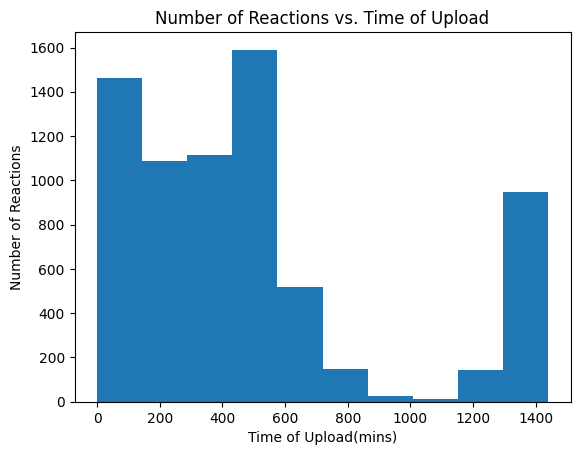

In [25]:
df['status_published'] = pd.to_datetime(df['status_published'])
df['time_published'] = df['status_published'].dt.hour * 60 + df['status_published'].dt.minute

print(df['num_reactions'].describe())

plt.hist(df['time_published'],bins=10)
plt.title('Number of Reactions vs. Time of Upload')
plt.xlabel('Time of Upload(mins)')
plt.ylabel('Number of Reactions')
plt.show()

Correlation matrix

<Axes: >

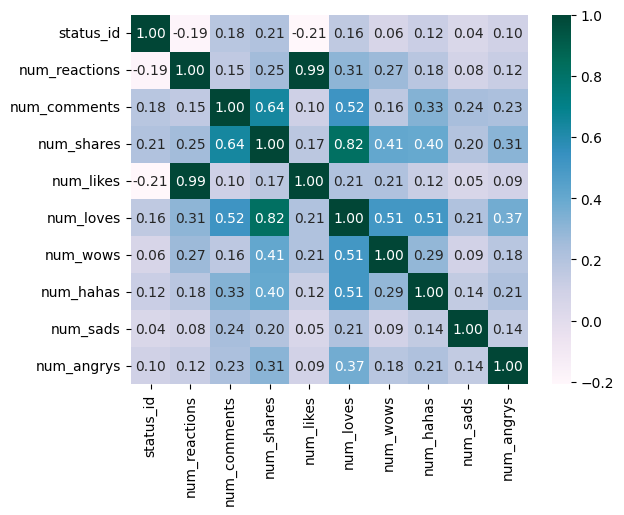

In [26]:
num_df=df.select_dtypes(include=['int64','float64'])
corr=num_df.corr()
sns.heatmap(corr, annot=True,cmap='PuBuGn',fmt=".2f")

Types of posts

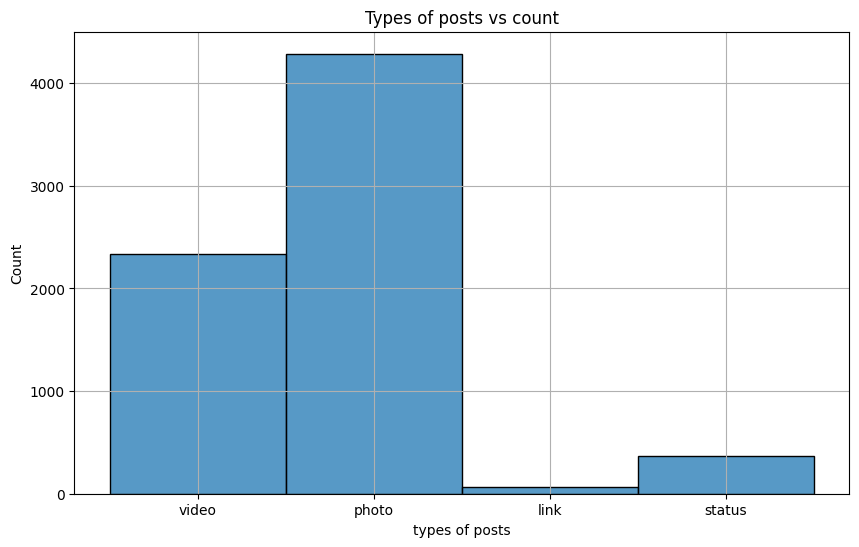

In [27]:
plt.figure(figsize=(10,6))
plt.title('Types of posts vs count')
sns.histplot(x="status_type",multiple='stack',data=df,bins=20,binwidth=2)
plt.xlabel('types of posts')
plt.grid(True)
plt.show()

AVERAGES :                                                                 
to check if there are outliers present                                     
Boxplot of each metric

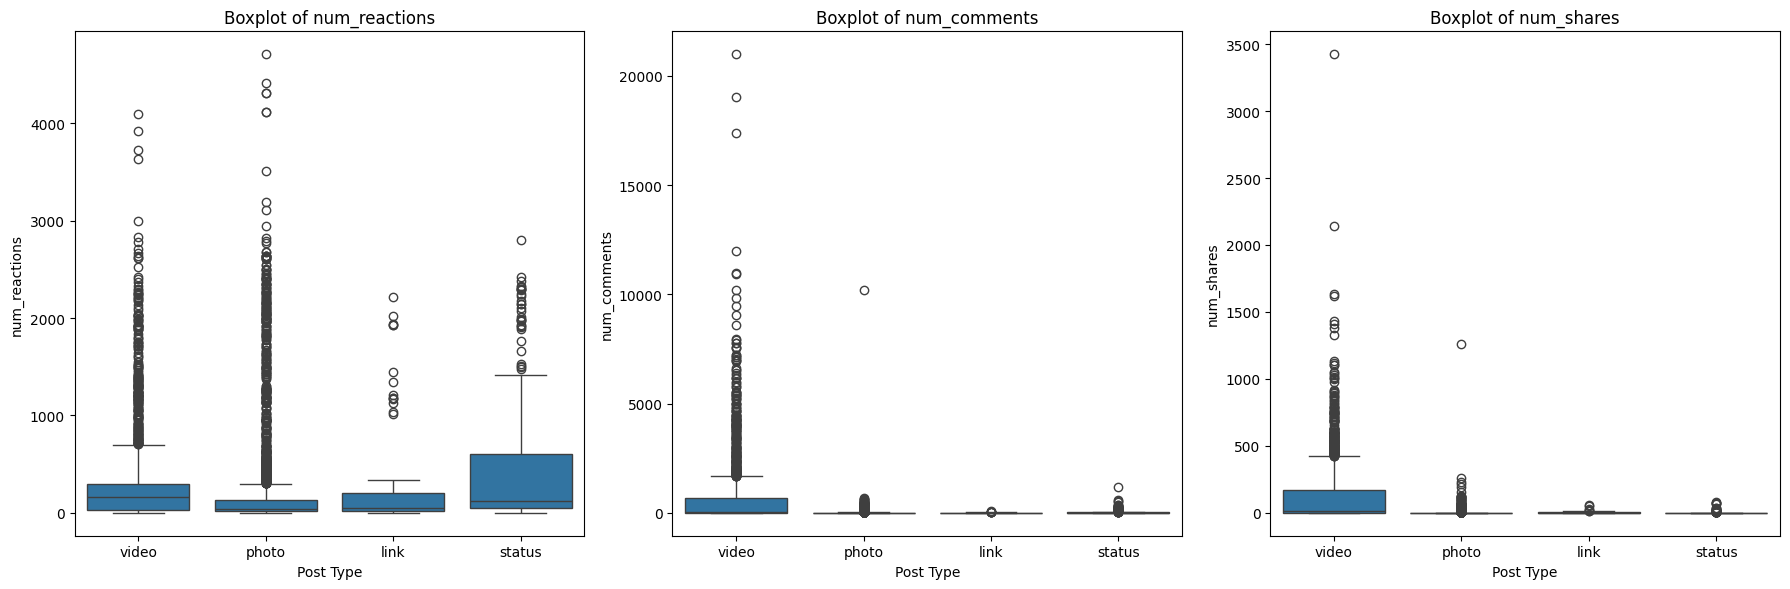

In [28]:
plt.figure(figsize=(18, 6))
metrics = ['num_reactions', 'num_comments', 'num_shares']
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='status_type', y=metric, data=df)
    plt.title(f'Boxplot of {metric}')
    plt.xlabel('Post Type')
    plt.ylabel(metric)
    plt.tight_layout()
plt.show()


In [29]:
average_values = df.groupby('status_type')[['num_reactions', 'num_comments', 'num_shares']].mean()
print(average_values)

average_values = df.groupby('status_type')[['num_reactions', 'num_comments', 'num_shares']].median()
print(average_values)

             num_reactions  num_comments  num_shares
status_type                                         
link            370.142857      5.698413    4.396825
photo           181.290345     15.993470    2.553871
status          438.783562     36.238356    2.558904
video           283.409597    642.478149  115.679949
             num_reactions  num_comments  num_shares
status_type                                         
link                  50.0           1.0         0.0
photo                 34.0           2.0         0.0
status               120.0          10.0         0.0
video                160.0          39.0        12.0


# KMEANS CLUSTERING

In [30]:
from sklearn.cluster import KMeans

X=df.iloc[:,[1,3,4,5,6,7,8,9,10,11]].values

Encoding categorical data

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
X=np.array(ct.fit_transform(X))
print(X)

[[0.0 0.0 0.0 ... 1 1 0]
 [0.0 1.0 0.0 ... 0 0 0]
 [0.0 0.0 0.0 ... 1 0 0]
 ...
 [0.0 1.0 0.0 ... 0 0 0]
 [0.0 1.0 0.0 ... 0 0 0]
 [0.0 1.0 0.0 ... 0 0 0]]


Feature Scaling

In [32]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

ELBOW METHOD

In [33]:
wcss=[]

for i in range(1,11):

    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)

    #fit the model to data
    kmeans.fit(X_scaled)

    #compute wcss values
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

plot the graph

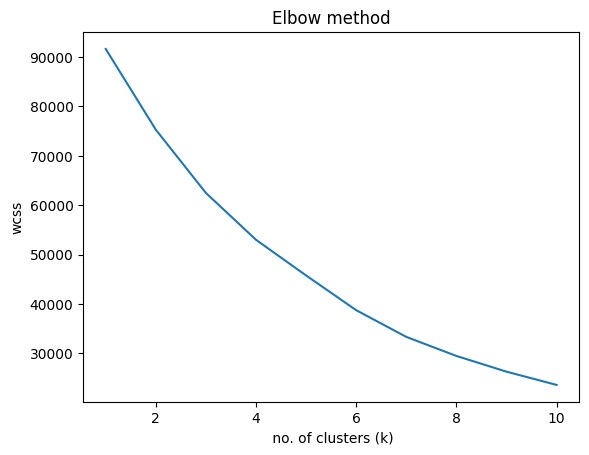

In [37]:
plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel(' no. of clusters (k)')
plt.ylabel('wcss')
plt.show()

PCA to reduce dimensions

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


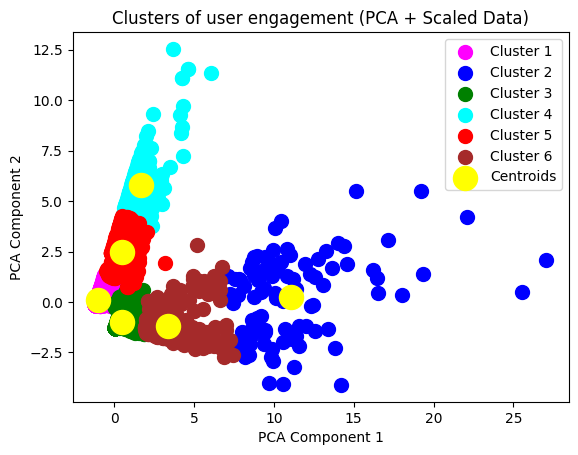

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_pca)

plt.scatter(X_pca[y_kmeans == 0, 0], X_pca[y_kmeans == 0, 1], s=100, c='magenta', label='Cluster 1')
plt.scatter(X_pca[y_kmeans == 1, 0], X_pca[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_pca[y_kmeans == 2, 0], X_pca[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X_pca[y_kmeans == 3, 0], X_pca[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X_pca[y_kmeans == 4, 0], X_pca[y_kmeans == 4, 1], s=100, c='red', label='Cluster 5')
plt.scatter(X_pca[y_kmeans == 5, 0], X_pca[y_kmeans == 5, 1], s=100, c='brown', label='Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

plt.title('Clusters of user engagement (PCA + Scaled Data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()